# Covid-19 data

Extraction, Transformation and Load of Covid19 data

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")  #sns.set(style="white") # #sns.set(style="darkgrid") 
#import lux
%matplotlib inline

## Pandemic data for Spain

**Data downloaded from https://github.com/montera34/escovid19data/blob/master/data**

In [2]:
evolucion = pd.read_csv('~/Trabajo_tfm/datos_csv/covid19-provincias-spain_consolidated.csv')
evolucion.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,hospitalized_accumulated,...,daily_deaths_avg7,daily_deaths_avg7_hosp_eus,deaths_last_week,num_casos_avg7,num_casos_prueba_pcr_avg7,num_casos2_avg7,ia14,source_name,source,comments
0,2020-01-01,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
evolucion.info()#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26843 entries, 0 to 26842
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          26843 non-null  object 
 1   province                      26843 non-null  object 
 2   ine_code                      26843 non-null  int64  
 3   ccaa                          26843 non-null  object 
 4   new_cases                     9966 non-null   float64
 5   PCR                           7451 non-null   float64
 6   TestAc                        957 non-null    float64
 7   activos                       3418 non-null   float64
 8   hospitalized                  19756 non-null  float64
 9   hospitalized_accumulated      2162 non-null   float64
 10  hospitalized_new              2086 non-null   float64
 11  intensive_care                19981 non-null  float64
 12  deceased                      21779 non-null  float64
 13  c

In [4]:
#pip install nbimporter
#!pip install ipynb

In [5]:
from ipynb.fs.full.funciones_eda import descripcionDatosDataset, calidad_datos, funcion_inversion_fecha,funcion_fecha

In [6]:
calidad_datos(evolucion)

Cantidad de filas: 26843
Cantidad de filas completas: 0
Cantidad de filas  incompletas: 26843
Porcentaje de filas incompletas: 100.0 %
Cantidad de nulos en las columnas  : 
date                                0
province                            0
ine_code                            0
ccaa                                0
new_cases                       16877
PCR                             19392
TestAc                          25886
activos                         23425
hospitalized                     7087
hospitalized_accumulated        24681
hospitalized_new                24757
intensive_care                   6862
deceased                         5064
cases_accumulated               12845
cases_accumulated_PCR           12587
recovered                       26319
deceased_hosp_eus               26258
num_casos                        6511
num_casos_prueba_pcr             6511
num_casos_prueba_test_ac         6511
num_casos_prueba_ag              6511
num_casos_prueba_elisa       

daily_deaths_hosp_eus
Conteo de ocurrencias por valor (not-null):582
Cantidad de nulos: 26261
Porcentaje de nulos: 97.83183697798309%
--------------------          *****          --------------------
daily_deaths_inc
Conteo de ocurrencias por valor (not-null):20646
Cantidad de nulos: 6197
Porcentaje de nulos: 23.08609320865775%
--------------------          *****          --------------------
daily_deaths_avg3
Conteo de ocurrencias por valor (not-null):20340
Cantidad de nulos: 6503
Porcentaje de nulos: 24.226055209924375%
--------------------          *****          --------------------
daily_deaths_avg7
Conteo de ocurrencias por valor (not-null):21397
Cantidad de nulos: 5446
Porcentaje de nulos: 20.288343329732147%
--------------------          *****          --------------------
daily_deaths_avg7_hosp_eus
Conteo de ocurrencias por valor (not-null):564
Cantidad de nulos: 26279
Porcentaje de nulos: 97.89889356629288%
--------------------          *****          --------------------
num

In [7]:
#print(f"Conteo de ocurrencias por valor: {evolucion['num_casos'].value_counts()}")
print (" Numero de registros con valor nulo :",evolucion[evolucion['num_casos'].isnull()].shape[0] )

 Numero de registros con valor nulo : 6511


In [8]:
#print(f"Conteo de ocurrencias por valor: {evolucion['num_casos2'].value_counts()}")
print (" Numero de registros con valor nulo :",evolucion[evolucion['num_casos2'].isnull()].shape[0] )

 Numero de registros con valor nulo : 167


In [9]:
evolucion[evolucion['num_casos2'].isnull()].date.count()

167

In [10]:
evolucion[evolucion['num_casos'].isnull()].date.count()

6511

- **Some unnecesary columns **

In [11]:
no_necesarias = [
    'ine_code','ccaa', 'new_cases', 'PCR', 'TestAc', 'activos', 'hospitalized', 'hospitalized_accumulated',
    'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated', 'cases_accumulated_PCR', 
    'recovered', 'deceased_hosp_eus', 'num_casos_prueba_pcr', 'num_casos_prueba_test_ac','num_casos_prueba_ag',
    'num_casos_prueba_elisa', 'num_casos_prueba_desconocida', 'num_hosp', 'num_uci', 'num_def', 'num_casos_cum2',
    'num_hosp_cum','num_uci_cum', 'num_def_cum', 'cases_per_cienmil', 'intensive_care_per_1000000',
    'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days', 'cases_7days', 'cases_PCR_14days',
    'cases_PCR_7days', 'daily_cases', 'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7','daily_deaths',
    'daily_deaths_hosp_eus', 'daily_deaths_inc','daily_deaths_avg3', 'daily_deaths_avg7',
    'daily_deaths_avg7_hosp_eus', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7', 'num_casos2_avg7','ia14',
    'source_name', 'source', 'comments']
evolucion.drop(columns = no_necesarias, axis = 1, inplace = True)

In [12]:
evolucion.drop('num_casos', inplace=True, axis=1)
evolucion.drop('num_casos_cum1', inplace=True, axis=1)
evolucion.drop('deaths_last_week', inplace=True, axis=1)

### Filter by date

In [13]:
datos_fechas = pd.read_csv("~/Trabajo_tfm/datos_csv/datos_fechas.csv", usecols=['fecha'])

In [14]:
dates = datos_fechas.fecha 

In [15]:
rango_fechas = np.arange(dates.size)
fechas =[]
for dia in rango_fechas :
    fecha = funcion_inversion_fecha (dates[dia])
    fechas.append(fecha)

In [16]:
fechas_ =[]
for fecha in fechas : 
    fechas_.append(funcion_fecha(fecha))

In [17]:
evolucion = evolucion[evolucion.date.isin(fechas_)]

In [18]:
evolucion.shape

(17524, 4)

In [19]:
evolucion.head()

,date,province,num_casos2,poblacion
3120,2020-03-01,Albacete,2.0,388167
3121,2020-03-01,Alicante/Alacant,0.0,1858683
3122,2020-03-01,Almería,0.0,716820
3123,2020-03-01,Araba/Álava,1.0,331549
3124,2020-03-01,Asturias,0.0,1022800


In [20]:
evolucion.tail()

,date,province,num_casos2,poblacion
20639,2021-01-31,Toledo,131.0,694844
20640,2021-01-31,Valencia/València,1072.0,2565124
20641,2021-01-31,Valladolid,138.0,519546
20642,2021-01-31,Zamora,24.0,172539
20643,2021-01-31,Zaragoza,166.0,964693


### Filter by provinces

In [21]:
evolucion.province.unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

In [22]:
provincias = ['Alicante/Alacant','Almería','Badajoz','Cádiz','Ciudad Real', 'Córdoba','Granada',
              'Huelva','Jaén','Coruña, A','Lugo','Madrid', 'Málaga','Ourense','Palencia','Pontevedra',
              'Salamanca', 'Sevilla','Valencia/València','Zamora', 'Zaragoza'] # provincias de estudio

In [23]:
evolucion = evolucion[evolucion.province.isin(provincias)] # filtro por provincias

In [24]:
evolucion.shape

(7077, 4)

### **Unifying  names**                     

In [25]:
evolucion = evolucion.rename({"province": "provincia"}, axis="columns")
evolucion = evolucion.rename({"date": "fecha"}, axis="columns")
evolucion = evolucion.rename({"num_casos2": "num_casos"}, axis="columns")

In [26]:
# transfoma la provincia a mayusculas para unificar con otros ficheros
def nombre_provincia(row):
    
    if row.provincia == 'Alicante/Alacant':
        return 'alicante'.upper()
    elif row.provincia == 'Almería':
        return 'almeria'.upper()
    elif row.provincia == 'Badajoz':
        return 'Badajoz'.upper()
    elif row.provincia == 'Cádiz':
        return 'Cadiz'.upper()
    elif row.provincia == 'Ciudad Real':
        return 'Ciudad_Real'.upper()
    elif row.provincia == 'Córdoba':
        return 'cordoba'.upper()
    elif row.provincia == 'Granada':
        return 'Granada'.upper()
    elif row.provincia == 'Huelva':
        return 'huelva'.upper()
    elif row.provincia == 'Jaén':
        return 'jaen'.upper()
    elif row.provincia == 'Coruña, A':
        return 'la_Coruña'.upper()
    elif row.provincia == 'Lugo':
        return 'lugo'.upper()
    elif row.provincia == 'Madrid':
        return 'Madrid'.upper()
    elif row.provincia == 'Málaga':
        return 'malaga'.upper()
    elif row.provincia == 'Ourense':
        return 'Orense'.upper()
    elif row.provincia == 'Palencia':
        return 'Palencia'.upper()
    elif row.provincia == 'Pontevedra':
        return 'Pontevedra'.upper()
    elif row.provincia == 'Salamanca':
        return 'Salamanca'.upper()
    elif row.provincia == 'Sevilla':
        return 'sevilla'.upper()
    elif row.provincia == 'Valencia/València':
        return 'Valencia'.upper()  
    elif row.provincia == 'Zamora':
        return 'Zamora'.upper()  
    elif row.provincia == 'Zaragoza':
        return 'Zaragoza'.upper()

In [27]:
evolucion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 3121 to 20643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   num_casos  7077 non-null   float64
 3   poblacion  7077 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 276.4+ KB


In [28]:
evolucion.provincia = evolucion.apply(lambda row: nombre_provincia(row), axis=1).rename('provincia')

In [29]:
evolucion_casos = pd.concat([  # alphabetically order
    evolucion[evolucion.provincia =='ALICANTE'],
    evolucion[evolucion.provincia =='ALMERIA'],
    evolucion[evolucion.provincia =='BADAJOZ'],
    evolucion[evolucion.provincia =='CADIZ'],
    evolucion[evolucion.provincia =='CIUDAD_REAL'],
    evolucion[evolucion.provincia =='CORDOBA'],
    evolucion[evolucion.provincia =='GRANADA'],
    evolucion[evolucion.provincia =='HUELVA'],
    evolucion[evolucion.provincia =='JAEN'],
    evolucion[evolucion.provincia =='LA_CORUÑA'],
    evolucion[evolucion.provincia =='LUGO'],
    evolucion[evolucion.provincia =='MADRID'],
    evolucion[evolucion.provincia =='MALAGA'],
    evolucion[evolucion.provincia =='ORENSE'],
    evolucion[evolucion.provincia =='PALENCIA'],
    evolucion[evolucion.provincia =='PONTEVEDRA'],
    evolucion[evolucion.provincia =='SALAMANCA'],
    evolucion[evolucion.provincia =='SEVILLA'],
    evolucion[evolucion.provincia =='VALENCIA'],
    evolucion[evolucion.provincia =='ZAMORA'],
    evolucion[evolucion.provincia =='ZARAGOZA']])

In [30]:
evolucion_casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7077 entries, 3121 to 20643
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   num_casos  7077 non-null   float64
 3   poblacion  7077 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 276.4+ KB


In [31]:
evolucion_casos.provincia.unique()

array(['ALICANTE', 'ALMERIA', 'BADAJOZ', 'CADIZ', 'CIUDAD_REAL',
       'CORDOBA', 'GRANADA', 'HUELVA', 'JAEN', 'LA_CORUÑA', 'LUGO',
       'MADRID', 'MALAGA', 'ORENSE', 'PALENCIA', 'PONTEVEDRA',
       'SALAMANCA', 'SEVILLA', 'VALENCIA', 'ZAMORA', 'ZARAGOZA'],
      dtype=object)

In [32]:
evolucion_casos = evolucion_casos.reset_index()

In [33]:
indice = ['index']
evolucion_casos.drop(columns = 'index', inplace= True, axis=1)

In [34]:
evolucion_casos.keys()

Index(['fecha', 'provincia', 'num_casos', 'poblacion'], dtype='object')

In [35]:
evolucion_casos.head()

,fecha,provincia,num_casos,poblacion
0,2020-03-01,ALICANTE,0.0,1858683
1,2020-03-02,ALICANTE,5.0,1858683
2,2020-03-03,ALICANTE,1.0,1858683
3,2020-03-04,ALICANTE,2.0,1858683
4,2020-03-05,ALICANTE,4.0,1858683


In [36]:
evolucion_casos.tail()

,fecha,provincia,num_casos,poblacion
7072,2021-01-27,ZARAGOZA,573.0,964693
7073,2021-01-28,ZARAGOZA,502.0,964693
7074,2021-01-29,ZARAGOZA,455.0,964693
7075,2021-01-30,ZARAGOZA,295.0,964693
7076,2021-01-31,ZARAGOZA,166.0,964693


### Sort by date and province

In [37]:
datos_evolucion = evolucion_casos.sort_values(by=['fecha', 'provincia'])
datos_evolucion = datos_evolucion.reset_index()
datos_evolucion.drop('index', inplace=True, axis=1)

In [38]:
datos_evolucion.head()

,fecha,provincia,num_casos,poblacion
0,2020-03-01,ALICANTE,0.0,1858683
1,2020-03-01,ALMERIA,0.0,716820
2,2020-03-01,BADAJOZ,2.0,673559
3,2020-03-01,CADIZ,0.0,1240155
4,2020-03-01,CIUDAD_REAL,0.0,495761


In [39]:
datos_evolucion.tail()

,fecha,provincia,num_casos,poblacion
7072,2021-01-31,SALAMANCA,105.0,330119
7073,2021-01-31,SEVILLA,395.0,1942389
7074,2021-01-31,VALENCIA,1072.0,2565124
7075,2021-01-31,ZAMORA,24.0,172539
7076,2021-01-31,ZARAGOZA,166.0,964693


In [40]:
poblacion = datos_evolucion['poblacion'].astype(float)
poblacion

0       1858683.0
1        716820.0
2        673559.0
3       1240155.0
4        495761.0
          ...    
7072     330119.0
7073    1942389.0
7074    2565124.0
7075     172539.0
7076     964693.0
Name: poblacion, Length: 7077, dtype: float64

In [41]:
datos_evolucion.drop(columns = ['poblacion'], axis=1, inplace=True)
datos_evolucion.insert(2, 'poblacion', poblacion)
datos_evolucion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   poblacion  7077 non-null   float64
 3   num_casos  7077 non-null   float64
dtypes: float64(2), object(2)
memory usage: 221.3+ KB


## Save processed covid19 data

In [42]:
datos_evolucion.to_csv("~/Trabajo_tfm/datos_csv/covid_preprocesado.csv")

## Visual inspection of covid19 data

In [43]:
contenedor = datos_evolucion ['fecha']
datos_evolucion['fecha'] = pd.to_datetime(contenedor)
datos_evolucion.set_index('fecha', inplace=True)
datos_evolucion.index #check datatype of index

DatetimeIndex(['2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
               '2020-03-01', '2020-03-01', '2020-03-01', '2020-03-01',
               '2020-03-01', '2020-03-01',
               ...
               '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
               '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
               '2021-01-31', '2021-01-31'],
              dtype='datetime64[ns]', name='fecha', length=7077, freq=None)

In [44]:
datos_evolucion.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7077 entries, 2020-03-01 to 2021-01-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   provincia  7077 non-null   object 
 1   poblacion  7077 non-null   float64
 2   num_casos  7077 non-null   float64
dtypes: float64(2), object(1)
memory usage: 221.2+ KB


In [45]:
datos_evolucion.tail()

,provincia,poblacion,num_casos
fecha,,,
2021-01-31,SALAMANCA,330119.0,105.0
2021-01-31,SEVILLA,1942389.0,395.0
2021-01-31,VALENCIA,2565124.0,1072.0
2021-01-31,ZAMORA,172539.0,24.0
2021-01-31,ZARAGOZA,964693.0,166.0


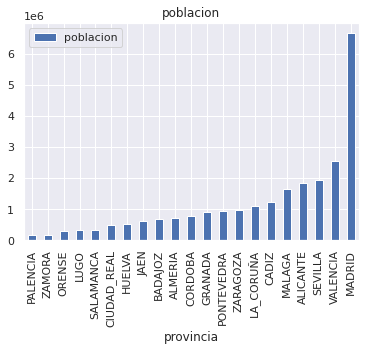

In [46]:
poblaciones = datos_evolucion[["poblacion", 'provincia']].groupby(('provincia')).mean()
poblaciones.sort_values(by='poblacion').plot(kind='bar', subplots=True, layout=(1, 1),
                                             sharex=True)
plt.show()

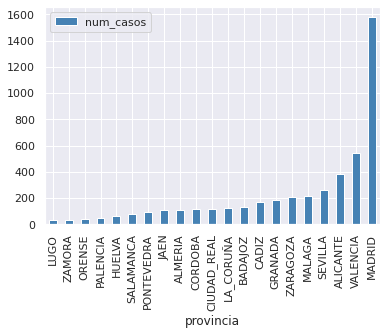

In [47]:
gcasos = datos_evolucion[['num_casos', 'provincia']].groupby(('provincia')).mean()
gcasos.sort_values(by='num_casos').plot(kind='bar', color='steelblue')
plt.show()

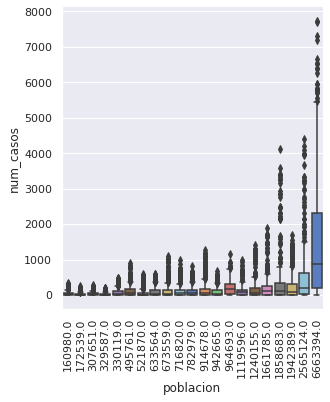

In [48]:
# Set up a factorplot
g = sns.catplot(x="poblacion", y="num_casos", data=datos_evolucion,
                kind="box", palette="muted", legend=True)
g.set_xticklabels(rotation=90)

# Show plot
plt.show()

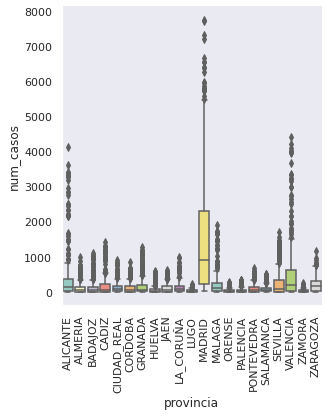

In [49]:
with sns.axes_style(style="dark"):  # style='ticks'
    ax = sns.catplot(x="provincia", y="num_casos",  data=datos_evolucion, kind="box",  # bar,violin, orient="h",
                     palette="Set3", legend=False)  # , **kde_kws)
    ax.set_xticklabels(rotation=90)

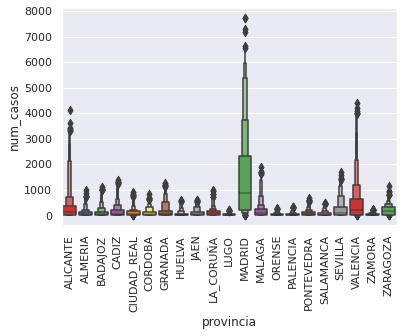

In [55]:
with sns.axes_style(style="darkgrid"):
    ax = sns.boxenplot(x="provincia", y="num_casos", data=datos_evolucion,palette="Set1")
    ax.set_xticklabels(labels=datos_evolucion.provincia.unique(), rotation=90)

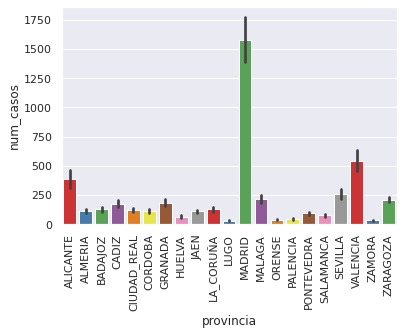

In [51]:
### figsize(7, 3)
with sns.axes_style(style="darkgrid"):
    ax = sns.barplot(x="provincia", y="num_casos", data=datos_evolucion, palette="Set1")
    ax.set_xticklabels(labels=datos_evolucion.provincia.unique(), rotation=90)

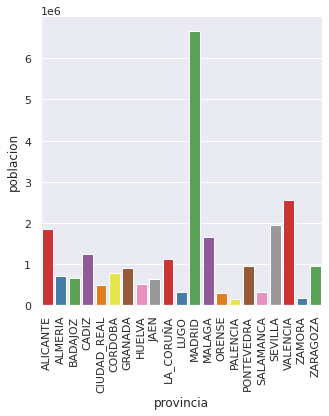

In [53]:
#figsize(7, 3)
with sns.axes_style(style="darkgrid"):
    ax = sns.catplot(x="provincia", y="poblacion", data=datos_evolucion, palette="Set1",
                     kind="bar")
    ax.set_xticklabels(labels=datos_evolucion.provincia.unique(), rotation=90)

In [50]:
casos_provincia = datos_evolucion[['num_casos', 'provincia']].groupby(('provincia'))
casos_provincia.describe()

num_casos                                                        \
                count         mean          std   min    25%    50%     75%   
provincia                                                                     
ALICANTE        337.0   386.086053   721.388110   0.0   14.0  123.0   355.0   
ALMERIA         337.0   112.590504   166.832264   0.0    3.0   62.0   140.0   
BADAJOZ         337.0   128.409496   208.425785   0.0    5.0   40.0   144.0   
CADIZ           337.0   173.035608   278.915873   0.0    3.0   57.0   213.0   
CIUDAD_REAL     337.0   119.474777   154.474956   0.0   18.0   71.0   163.0   
CORDOBA         337.0   116.608309   159.275819   0.0    3.0   51.0   151.0   
GRANADA         337.0   184.201780   288.071359   0.0   10.0   55.0   188.0   
HUELVA          337.0    63.878338   115.111282   0.0    1.0   11.0    67.0   
JAEN            337.0   109.818991   148.351316   0.0    3.0   41.0   150.0   
LA_CORUÑA       337.0   127.655786   168.350118   0.0    8.0   85.0   160.0   
LUGO            337.0    30.172107    38.208934   0.0    2.0   17.0    42.0   
MADRID          337.0  1578.952522  1757.824710  10.0  207.0  889.0  2310.0   
MALAGA          337.0   216.881306   338.075547   0.0    8.0  105.0   251.0   
ORENSE          337.0    38.842730    52.087800   0.0    2.0   21.0    50.0   
PALENCIA        337.0    45.534125    63.286007   0.0    3.0   23.0    62.0   
PONTEVEDRA      337.0    94.207715   124.714286   0.0    3.0   46.0   140.0   
SALAMANCA       337.0    76.246291   101.496226   0.0    7.0   35.0   105.0   
SEVILLA         337.0   257.952522   378.922428   0.0    5.0   80.0   321.0   
VALENCIA        337.0   539.955490   861.578097   0.0   25.0  201.0   627.0   
ZAMORA          337.0    33.884273    50.220066   0.0    2.0   11.0    42.0   
ZARAGOZA        337.0   209.813056   206.213029   0.0   24.0  163.0   313.0   

                     
                max  
provincia            
ALICANTE     4130.0  
ALMERIA       982.0  
BADAJOZ      1098.0  
CADIZ        1405.0  
CIUDAD_REAL   909.0  
CORDOBA       832.0  
GRANADA      1265.0  
HUELVA        593.0  
JAEN          607.0  
LA_CORUÑA     981.0  
LUGO          210.0  
MADRID       7738.0  
MALAGA       1907.0  
ORENSE        275.0  
PALENCIA      339.0  
PONTEVEDRA    669.0  
SALAMANCA     494.0  
SEVILLA      1702.0  
VALENCIA     4407.0  
ZAMORA        256.0  
ZARAGOZA     1171.0

In [56]:
from IPython.core.pylabtools import figsize

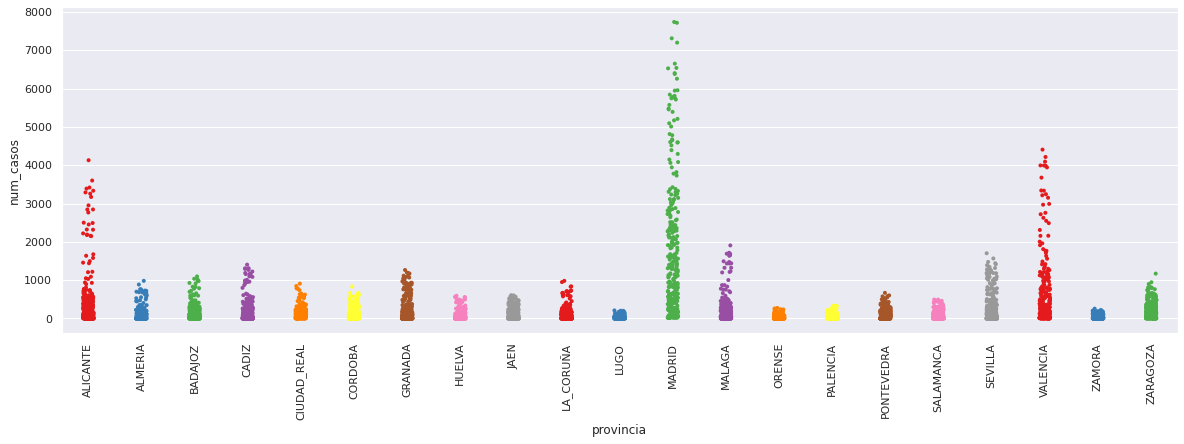

In [57]:
figsize(20, 6)
with sns.axes_style(style="darkgrid"):
    ax = sns.stripplot(x="provincia", y="num_casos", data=datos_evolucion,
                     #kind="strip", row_order="poblacion",# bar,violin, orient="h",
                     palette="Set1", size=4) #,   legend=False)  
    ax.set_xticklabels(labels=datos_evolucion.provincia.unique(), rotation=90)

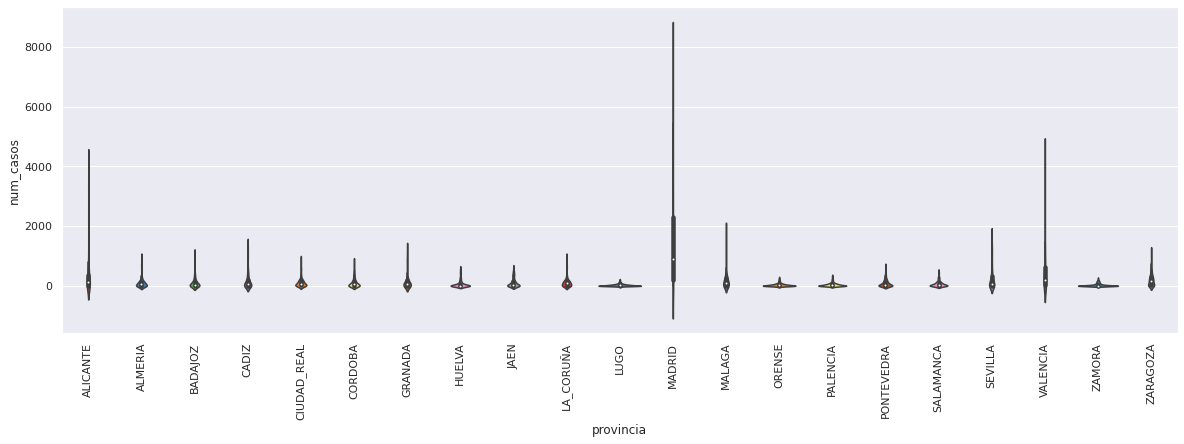

In [58]:
#figsize(10, 10)
with sns.axes_style(style="darkgrid"):
    ax =  sns.violinplot(data=datos_evolucion, x="provincia" , y='num_casos', palette="Set1", size=7,
                         orient="v") # ,,hue="provincia_"
    ax.set_xticklabels(labels=datos_evolucion.provincia.unique(), rotation=90)


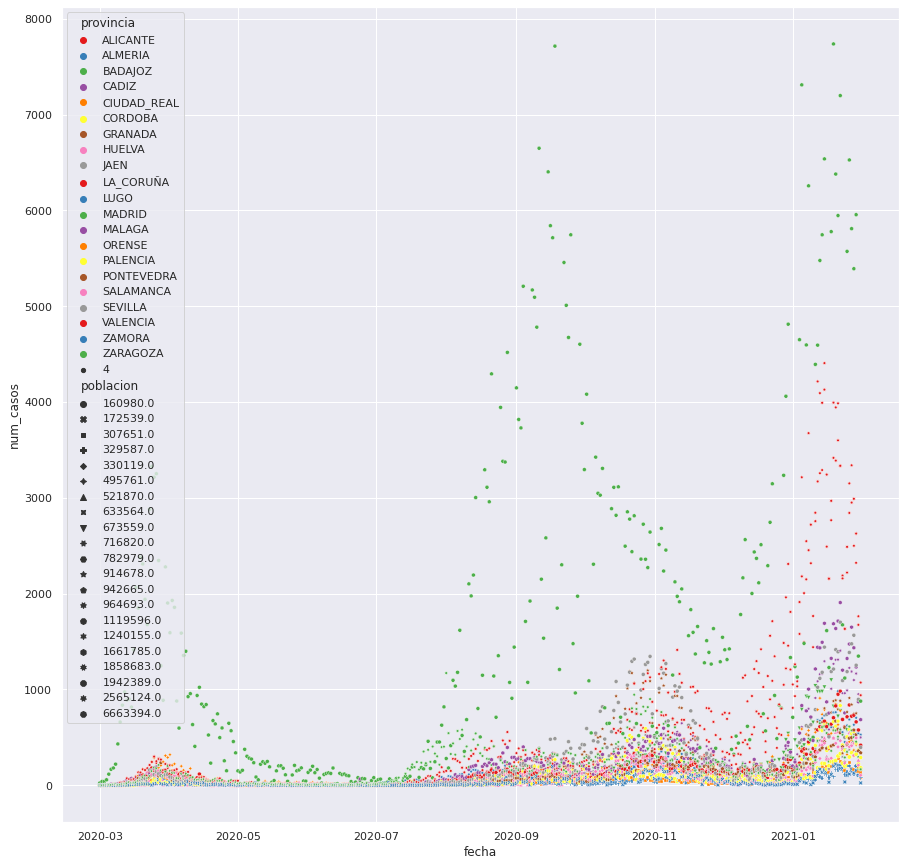

In [64]:
figsize(15, 15)
with sns.axes_style(style="darkgrid"):
    ax = sns.scatterplot(x="fecha", y="num_casos", data=datos_evolucion,
                         hue="provincia",style="poblacion", #**scatter_kwarg
                     #kind="strip", row_order="poblacion",# bar,violin, orient="h",
                     palette="Set1", size=4) #,   legend=False)  
    #ax.set_xticklabels(labels=datos_evolucion.fecha, rotation=90)
    
    #sns.scatterplot(ax=axes[count, 0], x=m1.index, y=m1[atributo], data=m1, style="provincia", #**scatter_kwargs,
     #                palette="Set1", hue="provincia")

In [60]:
datos_evolucion.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7077 entries, 2020-03-01 to 2021-01-31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   provincia  7077 non-null   object 
 1   poblacion  7077 non-null   float64
 2   num_casos  7077 non-null   float64
dtypes: float64(2), object(1)
memory usage: 221.2+ KB


In [61]:
pob100k = datos_evolucion.poblacion /100000.0
pob100k

fecha
2020-03-01    18.58683
2020-03-01     7.16820
2020-03-01     6.73559
2020-03-01    12.40155
2020-03-01     4.95761
                ...   
2021-01-31     3.30119
2021-01-31    19.42389
2021-01-31    25.65124
2021-01-31     1.72539
2021-01-31     9.64693
Name: poblacion, Length: 7077, dtype: float64

In [62]:
latente = datos_evolucion.num_casos/ pob100k
latente

fecha
2020-03-01     0.000000
2020-03-01     0.000000
2020-03-01     0.296930
2020-03-01     0.000000
2020-03-01     0.000000
                ...    
2021-01-31    31.806712
2021-01-31    20.335782
2021-01-31    41.791352
2021-01-31    13.909899
2021-01-31    17.207547
Length: 7077, dtype: float64